<a href="https://colab.research.google.com/github/Mohammadkaviany/MachineLearning/blob/main/PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [42]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("ggplot")

In [3]:
from sklearn.datasets import load_breast_cancer

In [6]:
cancer = load_breast_cancer()
df = pd.DataFrame(data = cancer.data, columns = cancer.feature_names)

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [11]:
df.shape

(569, 30)

#Feature Matrix

In [15]:
X = df.values

#z-score Standardization

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#Choosing right number of dimensions as K

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca_30 = PCA(n_components = 30 , random_state=2020)
pca_30.fit(X_scaled)
X_pca_30 = pca_30.transform(X_scaled)

In [24]:
print("variance explained by all 30 principal components =", 
      np.round(sum(pca_30.explained_variance_ratio_ * 100), 1), "%")

variance explained by all 30 principal components = 100.0 %


In [32]:
for i in range(0, 11):
  var = np.round(pca_30.explained_variance_ratio_[i] * 100, 3)
  print(f"--> Component {i}th contains {var}% of the variance explained\n")

--> Component 0th contains 44.272% of the variance explained

--> Component 1th contains 18.971% of the variance explained

--> Component 2th contains 9.393% of the variance explained

--> Component 3th contains 6.602% of the variance explained

--> Component 4th contains 5.496% of the variance explained

--> Component 5th contains 4.025% of the variance explained

--> Component 6th contains 2.251% of the variance explained

--> Component 7th contains 1.589% of the variance explained

--> Component 8th contains 1.39% of the variance explained

--> Component 9th contains 1.169% of the variance explained

--> Component 10th contains 0.98% of the variance explained



#Comulative Sum

In [34]:
np.cumsum(pca_30.explained_variance_ratio_* 100)

array([ 44.27202561,  63.24320765,  72.63637091,  79.23850582,
        84.73427432,  88.75879636,  91.00953007,  92.59825387,
        93.98790324,  95.15688143,  96.13660042,  97.00713832,
        97.81166331,  98.33502905,  98.64881227,  98.91502161,
        99.1130184 ,  99.28841435,  99.45333965,  99.55720433,
        99.65711397,  99.74857865,  99.82971477,  99.88989813,
        99.94150237,  99.96876117,  99.99176271,  99.99706051,
        99.99955652, 100.        ])

In [38]:
for i in range(0, 11):
  var = np.round(np.cumsum(pca_30.explained_variance_ratio_)[i] * 100, 3)

  print(f"--> {i} components can keep {var}% of the variance explained\n")

--> 0 components can keep 44.272% of the variance explained

--> 1 components can keep 63.243% of the variance explained

--> 2 components can keep 72.636% of the variance explained

--> 3 components can keep 79.239% of the variance explained

--> 4 components can keep 84.734% of the variance explained

--> 5 components can keep 88.759% of the variance explained

--> 6 components can keep 91.01% of the variance explained

--> 7 components can keep 92.598% of the variance explained

--> 8 components can keep 93.988% of the variance explained

--> 9 components can keep 95.157% of the variance explained

--> 10 components can keep 96.137% of the variance explained



Text(0, 0.5, 'Explained Variance')

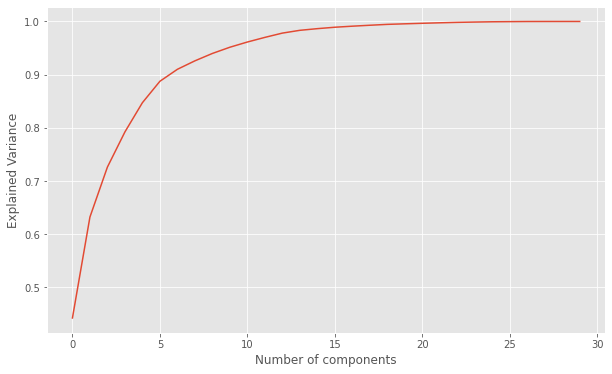

In [36]:
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca_30.explained_variance_ratio_))
plt.xlabel("Number of components")
plt.ylabel("Explained Variance")

#Creating a 2D Scatter plot (K=2)

In [40]:
pca_2 = PCA(n_components = 2, random_state = 2020)
pca_2.fit(X_scaled)
X_pca_2 = pca_2.transform(X_scaled)

Text(0, 0.5, 'Second principal components')

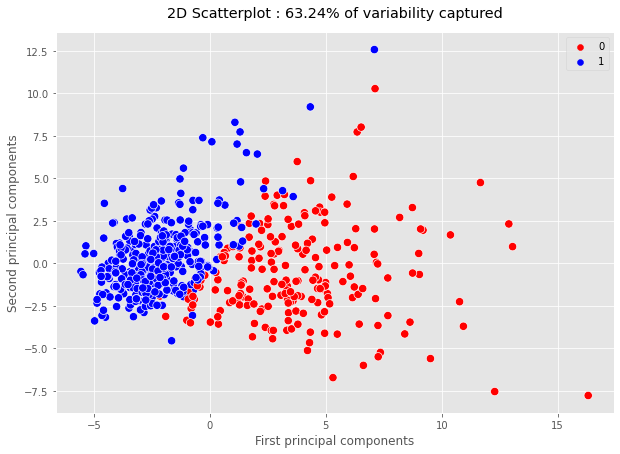

In [44]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca_2[:, 0], y=X_pca_2[:, 1], s = 70,
                hue = cancer.target, palette=["red", 'blue'])

plt.title("2D Scatterplot : 63.24% of variability captured", pad=15)
plt.xlabel("First principal components")
plt.ylabel("Second principal components")


In [45]:
from yellowbrick.features import PCA

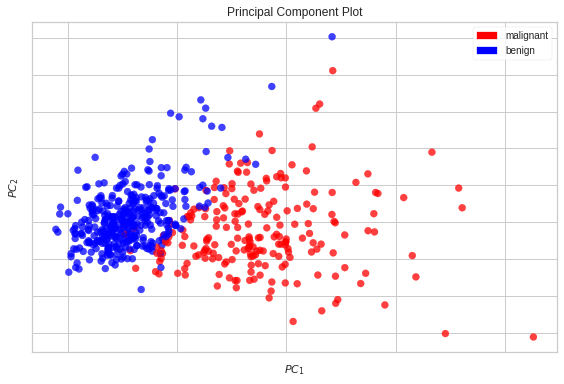

In [48]:
visualizer_2 = PCA(scale=True, projection=2,
                   classes = ["malignant", "benign"],
                   random_state = 2020, 
                   colors=["red", "blue"])



visualizer_2.fit_transform(X, cancer.target)
visualizer_2.show()

#Creating a 3D Scatter plot (K=3)

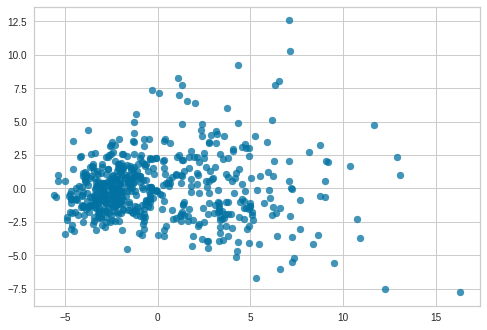

In [55]:
pca_3 = PCA(n_components = 3, random_state = 2020)
pca_3.fit(X_scaled)
X_pca_3 = pca_3.transform(X_scaled)

In [51]:
from mpl_toolkits import mplot3d

IndexError: ignored

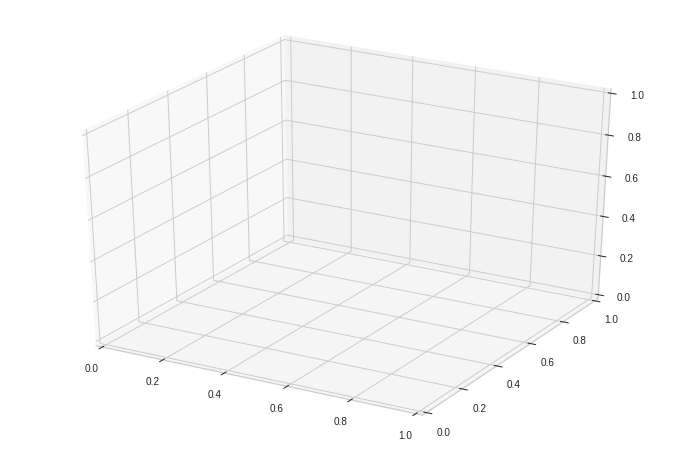

In [56]:
fig = plt.figure(figsize = (12, 8))
ax = plt.axes(projection = "3d")

sctt = ax.scatter3D(X_pca_3[:, 0], X_pca_3[:, 1], X_pca_3[:, 2],
                    c = cancer.target, s = 50, alpha = 0.6)

plt.title("3D Scatterplot: 72.64% of variability captured", pad=15)
plt.xlabel("First principal components")
plt.ylabel("Second principal components")
ax.set_zlabel("Third principal components")

In [54]:
X_pca_3.shape

(569, 2)

In [ ]:
https://rukshanpramoditha.medium.com/principal-component-analysis-pca-with-scikit-learn-1e84a0c731b0